## Univariate analysis 
โจทย์การวิเคราะห์ปัจจัยที่ทำให้เกิดอุบัติเหตุทางรถยนต์

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
roadsafe_df = pd.read_csv('https://raw.githubusercontent.com/soncomqiq/datascienceforSCG/master/dftRoadSafety_Accidents_2016.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


> ลองเรียกข้อมูล 3 แถวแรกออกมา

In [38]:
roadsafe_df.head(3)

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2016010000005,519310.0,188730.0,-0.279323,51.584754,1,3,2,1,01/11/2016,3,02:30,28,E09000005,3,4006,6,30.0,0,-1,-1,0,0,0,5,1,1,0,0,1,1,E01000543
1,2016010000006,551920.0,174560.0,0.184928,51.449595,1,3,1,1,01/11/2016,3,00:37,18,E09000004,3,207,6,30.0,9,4,6,0,0,0,4,1,1,0,0,1,1,E01000375
2,2016010000008,505930.0,183850.0,-0.473837,51.543563,1,3,1,1,01/11/2016,3,01:25,26,E09000017,3,4020,1,30.0,1,4,3,4020,0,0,4,1,1,0,0,1,1,E01033725


> ลองแสดงชื่อคอลัมน์ทั้งหมดของ DataFrame นี้

In [11]:
roadsafe_df.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location'],
      dtype='object')

> ลองหาข้อมูลค่าเฉลี่ยและส่วนเบี่ยงเบนมาตรฐานของคอลัมน์ Speed_limit  
> ลองหาข้อมูลค่าเฉลี่ยและส่วนเบี่ยงเบนมาตรฐานของคอลัมน์ Police_Force

In [39]:
roadsafe_df.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
count,136614.000000,1.366140e+05,136614.000000,136614.000000,136621.000000,136621.000000,136621.000000,136621.000000,136621.000000,136621.000000,136621.000000,136621.000000,136621.000000,136584.000000,136621.000000,136621.000000,136621.000000,136621.000000,136621.000000,136621.000000,136621.000000,136621.000000,136621.000000,136621.000000,136621.000000,136621.000000,136621.000000
mean,448699.363169,2.883354e+05,-1.304881,52.482399,29.860402,2.816170,1.848179,1.327644,4.115890,342.786680,4.143638,919.997145,5.183735,37.943683,2.233002,1.696313,2.647712,321.590678,0.011192,0.824375,1.983509,1.553099,1.291697,0.085338,0.055409,1.352508,1.253965
std,95230.253169,1.570588e+05,1.398947,1.414390,25.252440,0.418152,0.710117,0.789296,1.917292,258.403794,1.456215,1753.634022,1.658072,14.041669,2.501116,2.354033,3.226569,1202.759007,0.154659,1.927500,1.676938,1.690541,0.588247,0.654925,0.557042,0.477860,0.464658
min,76702.000000,1.107500e+04,-7.389809,49.919716,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,-1.000000,20.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000
25%,386355.750000,1.764248e+05,-2.204357,51.473779,6.000000,3.000000,1.000000,1.000000,2.000000,102.000000,3.000000,0.000000,6.000000,30.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
50%,454126.000000,2.374855e+05,-1.201205,52.025165,30.000000,3.000000,2.000000,1.000000,4.000000,323.000000,4.000000,65.000000,6.000000,30.000000,2.000000,2.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,527660.000000,3.897438e+05,-0.159708,53.401675,45.000000,3.000000,2.000000,1.000000,6.000000,516.000000,6.000000,640.000000,6.000000,40.000000,3.000000,4.000000,6.000000,0.000000,0.000000,0.000000,4.000000,1.000000,2.000000,0.000000,0.000000,2.000000,1.000000
max,655256.000000,1.178623e+06,1.757858,60.490191,98.000000,3.000000,16.000000,58.000000,7.000000,941.000000,6.000000,9918.000000,9.000000,70.000000,9.000000,4.000000,6.000000,9999.000000,2.000000,8.000000,7.000000,9.000000,5.000000,7.000000,7.000000,3.000000,3.000000


> คอลัมน์ Weather_Conditions มีข้อมูลที่สามารถนำมาใช้ได้กี่แถว

* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html

In [15]:
roadsafe_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136621 entries, 0 to 136620
Data columns (total 32 columns):
Accident_Index                                 136621 non-null object
Location_Easting_OSGR                          136614 non-null float64
Location_Northing_OSGR                         136614 non-null float64
Longitude                                      136614 non-null float64
Latitude                                       136614 non-null float64
Police_Force                                   136621 non-null int64
Accident_Severity                              136621 non-null int64
Number_of_Vehicles                             136621 non-null int64
Number_of_Casualties                           136621 non-null int64
Date                                           136621 non-null object
Day_of_Week                                    136621 non-null int64
Time                                           136619 non-null object
Local_Authority_(District)                     136

> ให้ List ข้อมูลที่มี Speed_limit เป็น NaN

In [0]:
roadsafe_df.loc[roadsafe_df['Speed_limit'].isnull()]

> ให้ List ข้อมูลที่มี Speed_limit ที่ไม่เป็น NaN

In [0]:
roadsafe_df.loc[~roadsafe_df['Speed_limit'].isnull()]

> ใช้เมทอด seaborn.distplot วาดกราฟฮิสโตแกรม(Histrogram) และ กราฟเส้นโค้งปกติ(Normal Curve) โดยใช้ข้อมูลจากคอลัมน์ Age มาวาดกราฟ

* เพิ่มเติม: http://seaborn.pydata.org/generated/seaborn.distplot.html

In [0]:
roadsafe_df['Speed_limit']

> แปลงข้อมูลคอลัมน์ Speed_limit ให้เป็นตัวเลข โดยถ้าเกิด Error ให้ Set ค่านั้นเป็น NaN

In [0]:
speed_df = pd.to_numeric(roadsafe_df['Speed_limit'], errors='coerce')

> ใส่ข้อมูลที่เป็น NaN ด้วยค่าเฉลี่ยของ limit_speed ใน คอลัมน์ limit_speed 

In [0]:
roadsafe_df['Speed_limit'] = roadsafe_df['Speed_limit'].transform(lambda x: x.fillna(roadsafe_df['Speed_limit'].mean()))

> ให้ drop แถวที่ข้อมูลในคอลัมน์ Speed_limit เป็น NaN

In [0]:
speed_df = speed_df.dropna()

> ให้แปลงข้อมูลใน Columns เป็น Integer

In [0]:
speed_df = speed_df.astype(int)

In [0]:
speed_df

รวาดกราฟฮิสโตแกรมที่เป็นข้อมูลแบบ categorical variables (จะเป็นกราฟแบบไม่ต่อเนื่อง)

เพิ่มเติม: https://seaborn.pydata.org/generated/seaborn.countplot.html

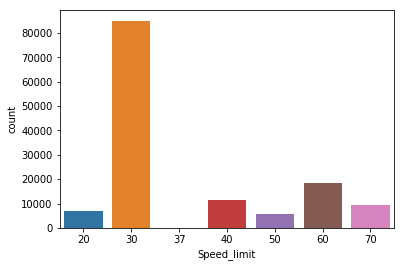

In [59]:
sns.countplot(speed_df)

> เป็นการสร้างเมทอดขึ้นมาเองโดยใช้ชื่อว่า plot_column และมีข้อมูลที่ต้องใส่เข้ามา 5 ตัว
1. my_df เป็นตารางข้อมูลที่ต้องการจะวาด
2. col เป็นชื่อคอลัมน์ของตารางข้อมูล my_df ที่ต้องการจะวาด
3. chart_type จะวาดกราฟนี้เป็นแบบ Histrogram หรือ Density และถ้าไม่ใส่ค่านี้มา จะกำหนดค่าเริ่มต้นเป็น 'Histrogram'
4. type ต้องการแปลงข้อมูลในนี้ให้เป็น Type ไหน ถ้าไม่ใส่จะกำหนดค่าเริ่มต้นให้เป็น int(Integer)
5. bin_size จำนวนของข้อมูลของกราฟ ถ้าไม่ได้ใส่มาให้จะกำหนดค่าเริ่มต้นเป็น 25 ตัว

In [0]:
def plot_column(my_df, col, chart_type='Histogram', dtype=int,
               bin_size=25):
    temp_df = pd.to_numeric(my_df[col], errors='coerce')
    temp_df = temp_df.dropna()
    temp_df = temp_df.astype(dtype)
    if chart_type=='Histogram':
        ax = sns.countplot(temp_df)
    elif chart_type=='Density':
        ax = sns.distplot(temp_df)
    xmin, xmax = ax.get_xlim()
    ax.set_xticks(np.round(np.linspace(xmin, xmax, bin_size), 2))
    plt.tight_layout()
    plt.locator_params(axis='y', nbins=6)
    plt.show()

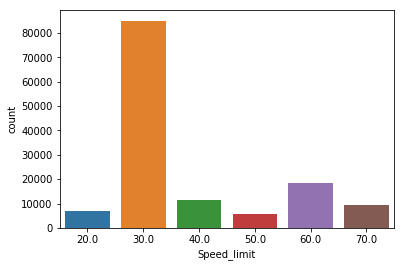

In [58]:
sns.countplot(roadsafe_df['Speed_limit'])

> เรียกเมทอด plot_column ที่เราสร้างขึ้นมาเองและใส่ข้อมูลกับชื่อของคอลัมน์ที่ต้องการวาดกราฟลงไป ที่เหลือให้เป็นค่าเริ่มต้น

25


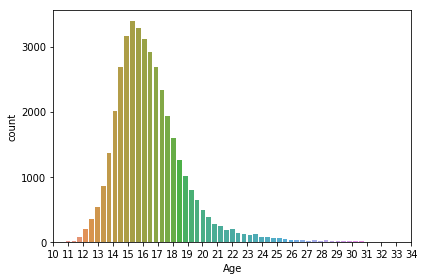

In [0]:
plot_column(medalists_df, 'Age')

### Calculate Skewness
การคำนวณค่าความเบ้  
> ความเบ้คือการบ่งบอกการกระจายของข้อมูลว่าสมดุลหรือไม่
อ่านเพิ่มเติม: https://www.manufacturingterms.com/Thai/Skewness.html

> 1. หา Skewness
2. หา Mean
3. หา Median
ของคอลัมน์ Speed_limit

In [64]:
from scipy.stats import skew
speed_df = pd.to_numeric(roadsafe_df['Speed_limit'], errors='coerce')
speed_df = speed_df.dropna()
speed_df = speed_df.astype(int)
print("Skewness is {}".format(skew(speed_df)))
print("Mean is {}".format(np.mean(speed_df)))
print("Median is {}".format(np.median(speed_df)))

Skewness is 1.1442003493482573
Mean is 37.94368300825865
Median is 30.0


> หา Count 3 อันดับแรกของคอลัมน์ Day_of_Week
* อ่านเพิ่มเติม:https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html

In [0]:
speed_count=roadsafe_df['Day_of_Week'].value_counts().nlargest(3).to_frame()

In [66]:
#sports_count.reset_index(inplace=True)
print(speed_count)


   Day_of_Week
6        22579
5        20949
4        20871


> ลอง Plot Graph ที่ได้จาก 3 อันดับแรก

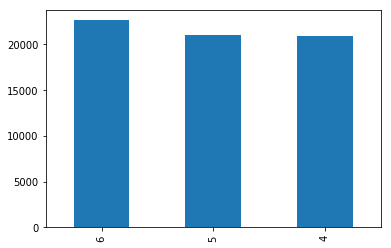

In [68]:
ax = speed_count.plot.bar(y='Day_of_Week')
ax.get_legend().remove()

> ลอง Plot Graph โดยให้แกน x เรียงจากน้อยไปมาก

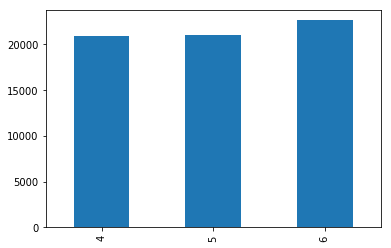

In [71]:
speed_count.sort_index(inplace=True)
ax = speed_count.plot.bar(y='Day_of_Week')
ax.get_legend().remove()